#                    Student Performance Multi Class Classification 

## Data Prep

In [1]:
import pandas as pd


student_data = pd.read_csv('/content/student-mat.csv', delimiter = ';')
pd.set_option('display.max_columns',None)
print(student_data.shape)
student_data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [2]:
student_data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [3]:
def classify_performance(col):
    if col < 10:
        return 0
    elif col >= 10 and col < 15:
        return 1
    else:
        return 2

In [4]:
def binary_classify_performance(col):
    if col < 10:
        return 0
    else:
        return 1

In [5]:
student_data['Has_Succeeded'] = student_data['G3'].apply(classify_performance)
student_data.drop(['G3'],axis=1,inplace=True)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Has_Succeeded
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,1


In [6]:
student_data['Has_Succeeded'].value_counts()

1    192
0    130
2     73
Name: Has_Succeeded, dtype: int64

In [7]:
one_hot_encoding = pd.get_dummies(data=student_data, columns=['school', 'sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
one_hot_encoding.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Has_Succeeded,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [8]:
X = one_hot_encoding.drop(['Has_Succeeded'], axis=1)
y = one_hot_encoding['Has_Succeeded']

## Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## First Classifier: Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model_one = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='multinomial')

In [11]:
model_one.fit(X_train,y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [12]:
model_one.score(X_test, y_test)

0.8734177215189873

In [13]:
def is_correct(row):
    if row['True Performance'] == row['Predicted Performance']:
        return 'Yes'
    else:
        return 'No'

In [14]:
y_pred = model_one.predict(X_test)

comparison = pd.DataFrame()
comparison['True Performance'] = y_test
comparison['Predicted Performance'] = y_pred
comparison['Correct Prediction'] = comparison.apply(lambda row: is_correct(row), axis=1)
comparison

,True Performance,Predicted Performance,Correct Prediction
78,1,0,No
371,1,1,Yes
248,0,0,Yes
55,1,1,Yes
390,0,0,Yes
...,...,...,...
364,1,1,Yes
82,0,0,Yes
114,0,1,No
3,2,1,No


In [15]:
comparison['Correct Prediction'].value_counts()

Yes    69
No     10
Name: Correct Prediction, dtype: int64

## Second Classifier: Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

model_two = RandomForestClassifier(n_estimators = 1000, criterion='entropy', random_state=42)

In [17]:
model_two.fit(X_train,y_train)
model_two.score(X_test,y_test)

0.8607594936708861

In [18]:
y_pred = model_two.predict(X_test)

comparison = pd.DataFrame()
comparison['True Performance'] = y_test
comparison['Predicted Performance'] = y_pred
comparison['Correct Prediction'] = comparison.apply(lambda row: is_correct(row), axis=1)
comparison

,True Performance,Predicted Performance,Correct Prediction
78,1,0,No
371,1,1,Yes
248,0,0,Yes
55,1,1,Yes
390,0,0,Yes
...,...,...,...
364,1,1,Yes
82,0,0,Yes
114,0,0,Yes
3,2,1,No


In [19]:
comparison['Correct Prediction'].value_counts()

Yes    68
No     11
Name: Correct Prediction, dtype: int64

<BarContainer object of 10 artists>

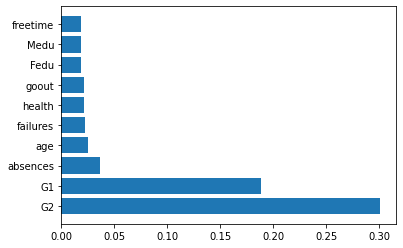

In [20]:
from matplotlib import pyplot as plt

importance = pd.DataFrame()
importance['Feature'] = X_train.columns
importance['Importance'] = model_two.feature_importances_
importance = importance.sort_values(by = ['Importance'], ascending = False)
importance = importance.head(10)
plt.barh(importance['Feature'], importance['Importance'])

## Third Classifier: Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_three = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [22]:
model_three.fit(X_train,y_train)
model_three.score(X_test,y_test)

0.8734177215189873

In [23]:
y_pred = model_two.predict(X_test)

comparison = pd.DataFrame()
comparison['True Performance'] = y_test
comparison['Predicted Performance'] = y_pred
comparison['Correct Prediction'] = comparison.apply(lambda row: is_correct(row), axis=1)
comparison

,True Performance,Predicted Performance,Correct Prediction
78,1,0,No
371,1,1,Yes
248,0,0,Yes
55,1,1,Yes
390,0,0,Yes
...,...,...,...
364,1,1,Yes
82,0,0,Yes
114,0,0,Yes
3,2,1,No


In [24]:
comparison['Correct Prediction'].value_counts()

Yes    68
No     11
Name: Correct Prediction, dtype: int64

## Save Best Model: 

### Based on top 10 most affecting features

In [25]:
import pickle 

file_name = 'model.sav'
pickle.dump(model_one, open(file_name, 'wb'))

In [26]:
X = one_hot_encoding[['Medu', 'Fedu', 'health', 'absences', 'age', 'freetime', 'goout', 'G1', 'G2', 'failures']]
y = one_hot_encoding['Has_Succeeded']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_one.fit(X_train,y_train)
model_one.score(X_test,y_test)

0.8607594936708861

In [28]:
file_name = 'model_one.sav'
pickle.dump(model_one, open(file_name, 'wb'))